# Data Analytics - Lab 6 - Model comparison

<span style="font-size: 20px;">
Konrad Prokop, 408687
</span>

In [56]:
from cmdstanpy import CmdStanModel
import arviz as az
import matplotlib.pyplot as plt

In [57]:
F = len("Konrad")
L = len("Prokop")
N = (L + F) * 100

In [58]:
model1 = CmdStanModel(stan_file='code_1.stan')
R = 1
sim1=model1.sample(data={'N': N},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [59]:
mod1 = sim1.draws_pd()
mod1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.01,-0.493528,1.3191,2.00864,-0.676927,-0.137475,-0.723108,-0.012178,...,-0.076362,-1.05548,-1.53016,1.8352,0.14519,0.13068,0.456049,-0.12544,1.7849,-0.436957


In [60]:
model2 = CmdStanModel(stan_file='code_2.stan')
R = 1
sim2=model2.sample(data={'N': N},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [61]:
mod2 = sim2.draws_pd()
mod2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.256178,-0.426117,-0.118171,1.04493,0.070459,-0.872053,-0.036556,-1.33306,...,-4.1442,-1.86959,-3.31431,-4.84693,1.18175,0.65649,3.71113,-1.50486,-2.9031,-0.406648


In [62]:
mod1.iloc[:, -N:]

,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,-0.493528,1.3191,2.00864,-0.676927,-0.137475,-0.723108,-0.012178,0.471763,-0.11602,-0.178591,...,-0.076362,-1.05548,-1.53016,1.8352,0.14519,0.13068,0.456049,-0.12544,1.7849,-0.436957


In [63]:
model3 = CmdStanModel(stan_file='code_3.stan')
R = 1000
sim3=model3.sample(data={'N': N, 'y': mod1.iloc[0, -N:]},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [64]:
mod3 = sim3.draws_pd()
mod3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-2263.25,0.0,14.3855,0.0,1.0,1.0,2263.34,1.1838,-0.15938,-1.12751,...,-2.359790,0.323752,0.145352,1.301860,0.564560,-1.21250,-0.389078,-1.200030,-0.456206,0.268307
1,-2263.25,0.0,14.3855,0.0,1.0,1.0,2263.36,1.1838,-0.15938,-1.12751,...,-0.384183,0.423484,-0.778612,0.277742,0.168490,-1.67440,0.174477,-2.152040,-2.630240,-0.415104
2,-2263.25,0.0,14.3855,0.0,1.0,1.0,2263.26,1.1838,-0.15938,-1.12751,...,-1.484140,-0.974195,0.292691,-1.341310,1.850590,-1.33942,-0.497916,0.081246,-1.304950,-0.643495
3,-2263.25,0.0,14.3855,0.0,1.0,1.0,2263.35,1.1838,-0.15938,-1.12751,...,-0.240883,0.077015,0.009975,0.092017,-1.867710,-0.53380,-0.372599,-2.414060,-1.006450,1.627080
4,-2263.25,0.0,14.3855,0.0,1.0,1.0,2267.91,1.1838,-0.15938,-1.12751,...,0.822752,-1.431740,0.058766,-0.462259,-0.745824,-1.13101,-1.661160,0.229136,-1.121090,-0.191899


In [65]:
model4 = CmdStanModel(stan_file='code_4.stan')
R = 1000
sim4=model4.sample(data={'N': N, 'y': mod1.iloc[0, -N:]},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [66]:
mod4 = sim4.draws_pd()
mod4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-2045.15,0.0,14.3855,0.0,1.0,1.0,2046.74,0.874807,0.283906,1.09503,...,1.026010,7.350530,-0.058766,-1.538170,1.669270,-0.498687,-0.079872,-1.654370,14.563900,0.910366
1,-2045.15,0.0,14.3855,0.0,1.0,1.0,2048.48,0.874807,0.283906,1.09503,...,0.048885,-1.331280,0.094214,1.105590,-0.397273,-0.584737,-6.088810,2.050450,2.326840,0.341936
2,-2045.15,0.0,14.3855,0.0,1.0,1.0,2045.78,0.874807,0.283906,1.09503,...,0.545824,0.185261,0.627087,1.977200,0.880487,8.437440,-3.156550,-0.693901,-0.053377,0.260268
3,-2045.15,0.0,14.3855,0.0,1.0,1.0,2045.99,0.874807,0.283906,1.09503,...,-0.741434,-0.060127,-0.106433,-0.164706,-0.977553,-4.568660,-0.831405,-3.052220,0.852024,-1.508280
4,-2045.15,0.0,14.3855,0.0,1.0,1.0,2045.26,0.874807,0.283906,1.09503,...,3.585540,1.007230,1.560900,-0.366170,1.068020,0.522098,7.486480,-4.052540,1.008390,-0.311848


In [67]:
comp_dict = {'m3': sim3, 'm4': sim4}
comp = az.compare(comp_dict, ic='waic', scale='deviance')

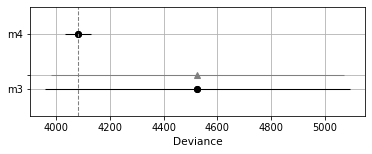

In [68]:
az.plot_compare(comp)
plt.grid()
plt.show()

In [69]:
comp = az.compare(comp_dict, ic='loo', scale='deviance')

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


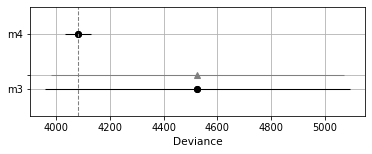

In [70]:
az.plot_compare(comp)
plt.grid()
plt.show()

In [ ]:
model5 = CmdStanModel(stan_file='code_5.stan')

X = mod2.iloc[0, 2:-N-3].values.reshape((-1, 3))

N = 1200  
X = X[:N]  

R = 1000

sim5_1=model5.sample(data={'N': N, 'K': 1, 'y': mod2.iloc[0, -N:], 'X': X[:,:1]},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

sim5_2=model5.sample(data={'N': N, 'K': 2, 'y': mod2.iloc[0, -N:], 'X': X[:,:2]},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

sim5_3=model5.sample(data={'N': N, 'K': 3, 'y': mod2.iloc[0, -N:], 'X': X},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

print('1 predictor:', sim5_1.draws_pd().head(),'2 predictors:', sim5_2.draws_pd().head().head())

In [72]:
comp_dict = {'m5 - 1 predictor': sim5_1, 'm5 - 2 predictors': sim5_2, 'm5 - 3 predictors': sim5_3}
comp = az.compare(comp_dict, ic='loo', scale='deviance')

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated

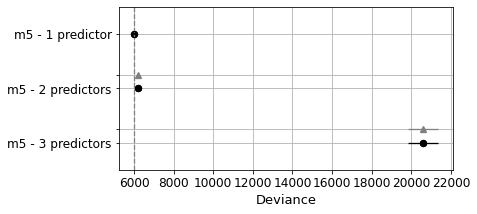

In [73]:
az.plot_compare(comp)
plt.grid()
plt.show()

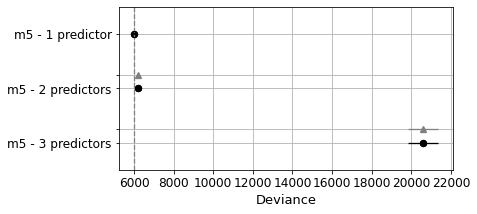

In [74]:
comp = az.compare(comp_dict, ic='waic', scale='deviance')
az.plot_compare(comp)
plt.grid()
plt.show()